# Questions

- 1.What is the name of the city where the  transaction is high ? 
- 2.On what date did the high  transaction occur?
- 3.What type of card was used for the transaction?
- 4.What is the percentage  of  gender of the person who made the transaction?
- 5.What was the Total amount of the transaction?
- 6.How many transactions were recorded in the index
- 7.What is the average amount spent by card per transaction??
- 8.Month By Month Amount 
-  9. Year by Year 
- 10 . Campare male or female in Exp Type 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This is Credit Card transactions of India Dataset 

# How to load dataset

In [3]:
df = pd.read_csv('Credit_card_transactions_-_India_-_Simple[1].csv')

In [36]:
df.head() 

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,October
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,August
2,2,Bengaluru,2014-08-27,Silver,Bills,F,101738,August
3,3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,April
4,4,Bengaluru,2015-05-05,Gold,Bills,F,171574,May


In [5]:
df.tail()

,index,City,Date,Card Type,Exp Type,Gender,Amount
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174
26051,26051,"Hyderabad, India",19-Oct-13,Signature,Bills,M,184410


In [6]:
df.shape

(26052, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
# Check Null Values

In [9]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [10]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


# 1.What is the name of the city where the  transaction is high ? 

In [11]:
df['City']=df['City'].str.split(',').str.get(0)

In [12]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555


In [13]:
df1 =df.groupby('City').sum()['Amount'].sort_values(ascending=False).head(10).reset_index()

In [14]:
df1

,City,Amount
0,Greater Mumbai,576751476
1,Bengaluru,572326739
2,Ahmedabad,567794310
3,Delhi,556929212
4,Kolkata,115466943
5,Lucknow,115334476
6,Chennai,114730600
7,Hyderabad,114493477
8,Surat,114486151
9,Kanpur,114370532


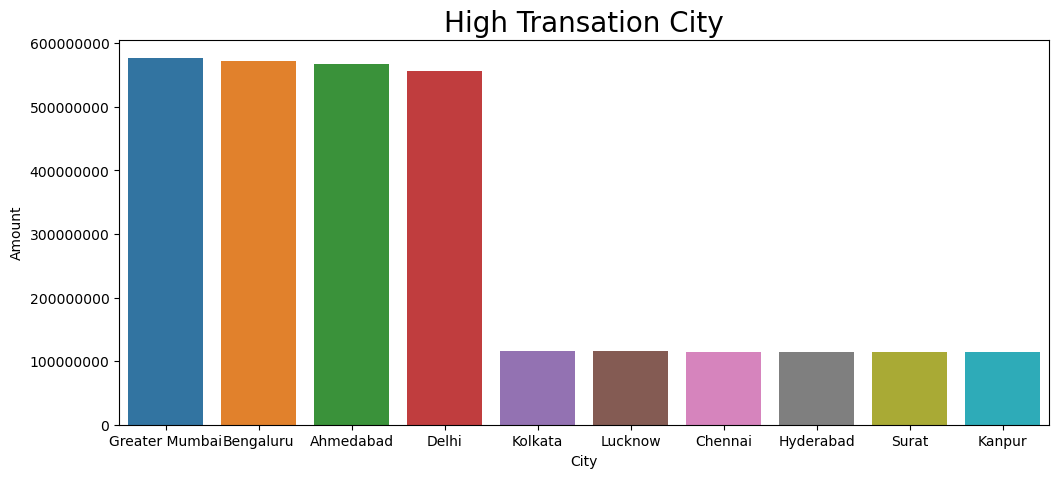

In [15]:
plt.figure(figsize=(12,5))
plt.title('High Transation City',fontsize=20)
sns.barplot(x='City',y = 'Amount',data=df1)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 2.On what date did the high transaction occur?

In [16]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


In [19]:
df.groupby('Date').sum()['Amount'].sort_values().reset_index().head(1)

,Date,Amount
0,2014-01-18,3408515


# 3.What type of card was used for the transaction?

In [20]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,2014-10-29,Gold,Bills,F,82475
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555


In [21]:
df2=df['Card Type'].value_counts().reset_index()

In [22]:
df2

,index,Card Type
0,Silver,6840
1,Signature,6447
2,Platinum,6398
3,Gold,6367


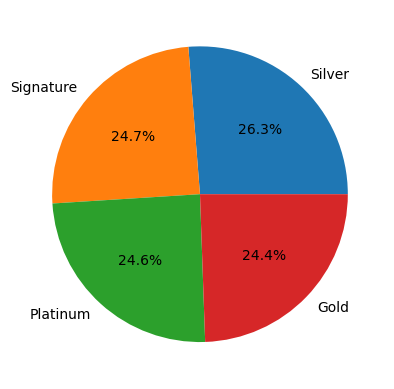

In [23]:
plt.pie(df2['Card Type'],labels=df2['index'],autopct='%0.1f%%')
plt.show()

# 4.What is the percentage  of  gender of the person who made the transaction?

In [24]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,2014-10-29,Gold,Bills,F,82475
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555


<AxesSubplot:ylabel='Gender'>

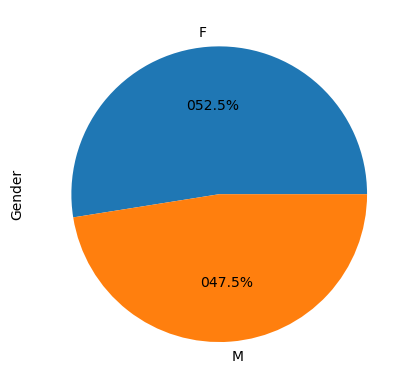

In [25]:
df['Gender'].value_counts(normalize=True).plot(kind='pie',autopct='0%.1f%%')

# - 5.What was the Total amount of the transaction?

In [26]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,2014-10-29,Gold,Bills,F,82475
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555


In [27]:
df['Amount'].sum()

4074833373

#  6.How many transactions were recorded in the index?

In [28]:
df.shape

(26052, 7)

# 7.What is the average amount spent by card per transaction?

In [29]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,2014-10-29,Gold,Bills,F,82475
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555


In [30]:
df.groupby('Card Type').agg('mean')['Amount'].reset_index()

,Card Type,Amount
0,Gold,154631.621800
1,Platinum,157492.813223
2,Signature,157133.721886
3,Silver,156376.273830


# 8 . Month By Month Amount 

In [31]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,2014-10-29,Gold,Bills,F,82475
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555


In [32]:
df['Month']=df['Date'].dt.month_name()

In [33]:
dfff=df.groupby('Month').sum()['Amount'].sort_index().reset_index()

In [34]:
dfff

,Month,Amount
0,April,416394734
1,August,218453126
2,December,416935415
3,February,383512624
4,January,431209556
5,July,197981416
6,June,191321039
7,March,410054446
8,May,375455609
9,November,404107968


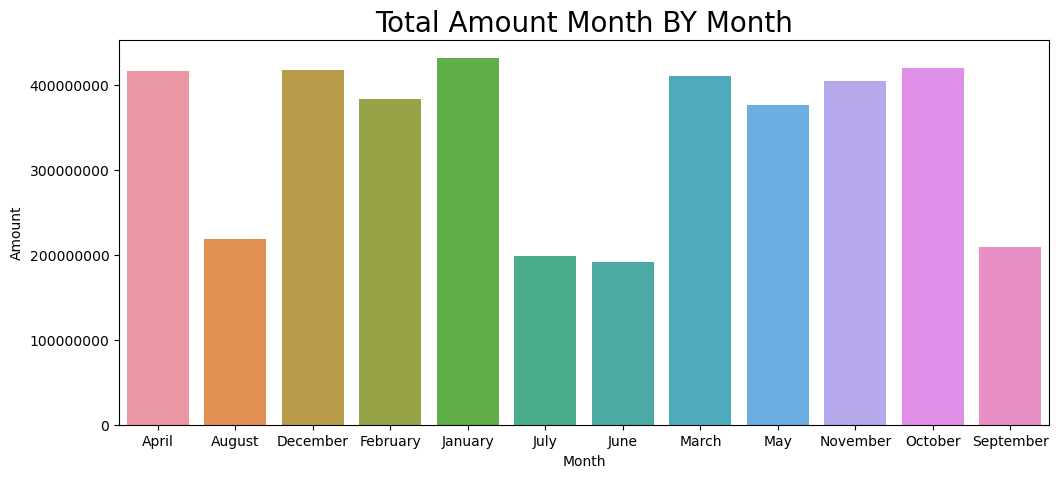

In [35]:
plt.figure(figsize=(12,5))
plt.title('Total Amount Month BY Month',fontsize=20)
sns.barplot(x='Month',y = 'Amount',data=dfff)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


# 9. Year by Year 

In [46]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,Year
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,October,2014
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,August,2014


In [40]:
df['Year']=df['Date'].dt.year

In [62]:
ddf=df.groupby('Year').sum()['Amount'].reset_index()

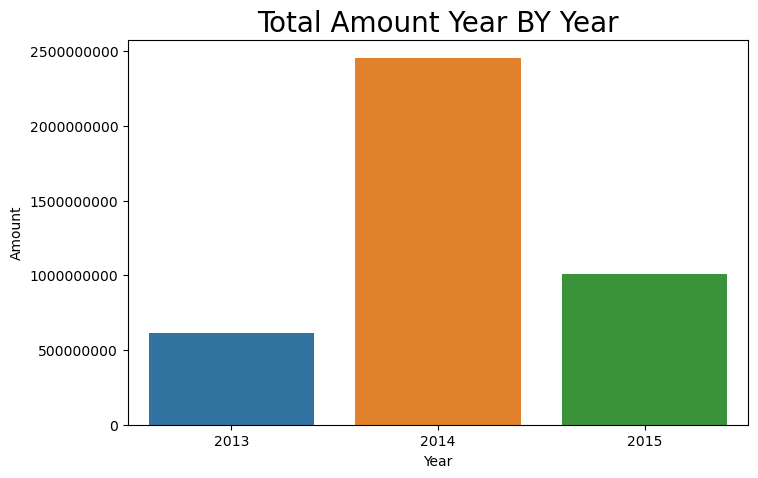

In [64]:
plt.figure(figsize=(8,5))
plt.title('Total Amount Year BY Year',fontsize=20)
sns.barplot(x='Year',y = 'Amount',data=ddf)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 10 . Campare male or female in Exp Type 

In [66]:
df.head(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,Year
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,October,2014
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,August,2014


In [68]:
df['Exp Type'].value_counts()

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

<AxesSubplot:xlabel='Exp Type'>

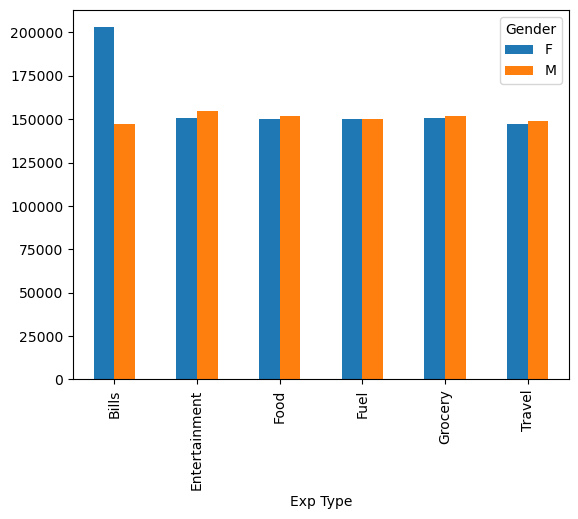

In [72]:
df.pivot_table(index='Exp Type',columns='Gender',values='Amount').plot(kind='bar')